In [162]:
import pandas as pd
import json
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from textblob import TextBlob

In [163]:
# with open('Demon_Slayer-reviews.json','r',encoding='utf-8') as f:
#     data = json.load(f)

# with open('Demon_Slayer-reviews_cleaned.json', 'w') as json_file:
#       json.dump(data, json_file)

In [164]:
# read the json file via. pandas
df = pd.read_json('Demon_Slayer-reviews_cleaned.json')
df

,title,rating,review_text,book name
0,Started this because of the anime.,5.0 out of 5 stars,This covers the first couple episodes of the a...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty"
1,Worth the 6 bucks,5.0 out of 5 stars,I got this because I saw the anime getting pop...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty"
2,Generic and rushed.,3.0 out of 5 stars,I picked this up because I'd heard the anime b...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty"
3,Excellent Shounen!,5.0 out of 5 stars,The art uses some shaky lines that can be hard...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty"
4,Best Manga Series Ever,5.0 out of 5 stars,I read a lot of manga... to the point where yo...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty"
...,...,...,...,...
2102,None,None,the book came in a perfect condition very sati...,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ..."
2103,None,None,Came in a good condition the story was outstan...,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ..."
2104,None,None,It was amazing. Nothing damaged and came very ...,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ..."
2105,None,None,使われている単語でちょっと難しめなものが、英検準一級必須単語だったりして、勉強の合間の息抜き...,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ..."


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2107 entries, 0 to 2106
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1239 non-null   object
 1   rating       1239 non-null   object
 2   review_text  2095 non-null   object
 3   book name    2107 non-null   object
dtypes: object(4)
memory usage: 66.0+ KB


In [166]:
# remove the unneeded text in the rating column
df.loc[df.rating != '','rating'] = df.loc[:,'rating'].apply(lambda x : str(x).replace('.0 out of 5 stars','').strip())

In [167]:
# filter values with no rating
df.loc[df.rating != '','rating'] = df.loc[:,'rating']

In [168]:
# fill up null values
df = df.fillna('')

In [169]:
# remove any non-latin text
df.review_text = df.review_text.str.replace(r'[^\x00-\x7F]+','',regex=True)

<AxesSubplot:xlabel='rating', ylabel='count'>

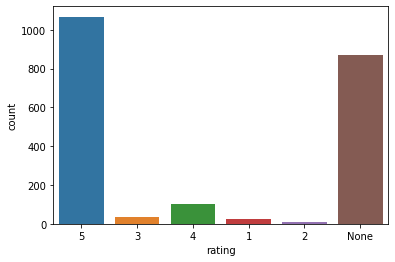

In [170]:
import seaborn as sd
import matplotlib.pyplot as pypl

sd.countplot(x=df['rating'])

In [171]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [172]:
lemmatizer = WordNetLemmatizer()

from stop_words import get_stop_words

stop_words = set(get_stop_words('en'))
stop_words.update(stopwords.words('english'))

In [173]:
def text_preprocess(text):
    
    text = ' '.join([contractions_dict[word] if word in contractions_dict else word for word in text.split(' ')])
    
    text = re.sub('\W| |\d',' ',text)
    
    text = text.lower()
    
    text = word_tokenize(text)
    
    text = [word for word in text if word.lower() not in list(stop_words)]
    
    text = [lemmatizer.lemmatize(word,pos='v') for word in text]
    
    text = ' '.join(text)
    
    return text

In [174]:
df.review_text = df.review_text.apply(lambda x : text_preprocess(x))

In [175]:
df.review_text.dtypes

dtype('O')

In [176]:
def wordcloud(text):

    wc = WordCloud(width=400, height=300, max_words=500, colormap="Dark2",scale=4, max_font_size=50).generate(text.str.cat(sep="\n"))
    pypl.figure(figsize=(20,10))
    pypl.imshow(wc, interpolation='bilinear')
    pypl.axis("off")
    pypl.show()

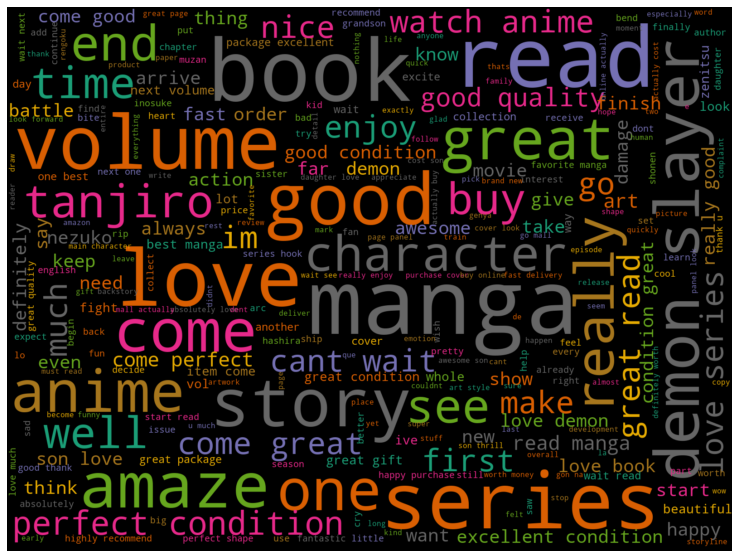

In [177]:
wordcloud(df.loc[df['rating'] == '5','review_text'])

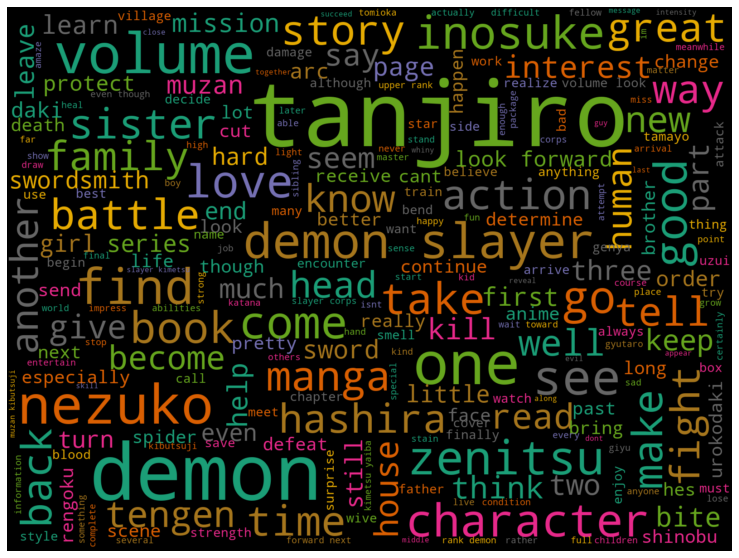

In [178]:
wordcloud(df.loc[df['rating'] == '4','review_text'])

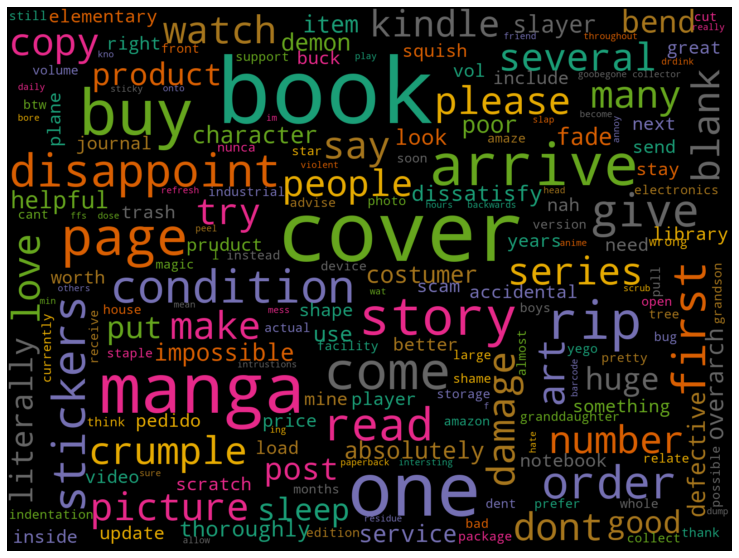

In [179]:
wordcloud(df.loc[df['rating'] == '1','review_text'])

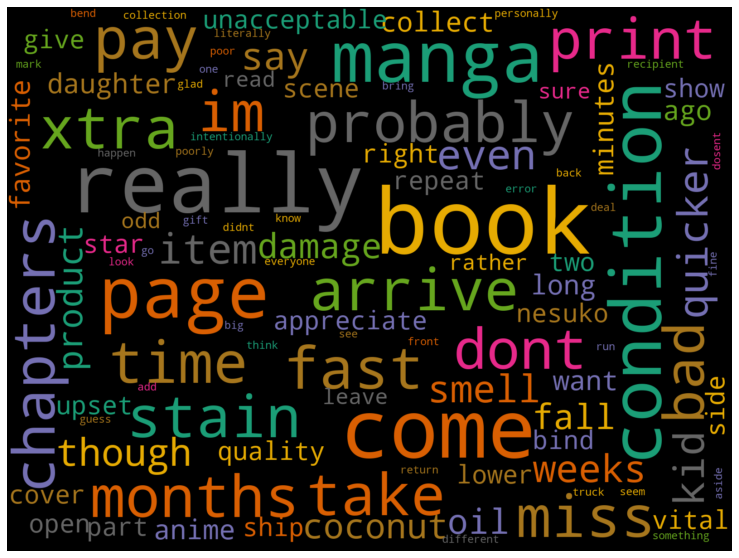

In [180]:
wordcloud(df.loc[df['rating'] == '2','review_text'])

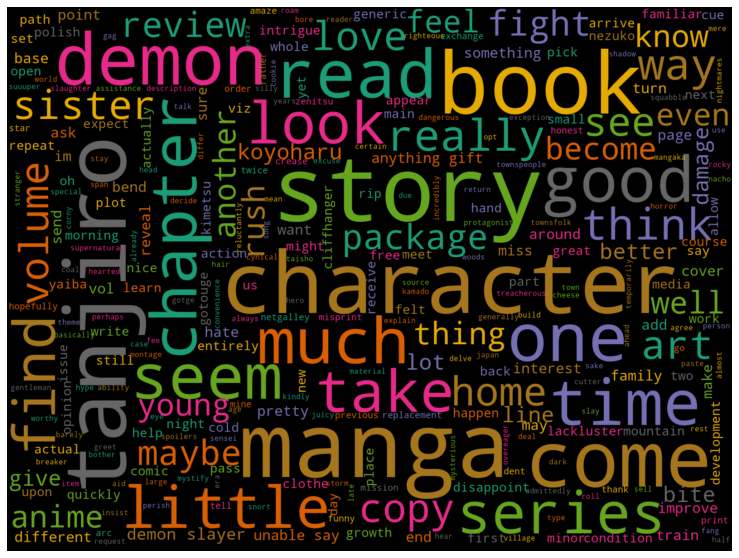

In [181]:
wordcloud(df.loc[df['rating'] == '3','review_text'])

In [182]:
df['length'] = df['review_text'].apply(lambda x : len(str(x)))

In [183]:
df

,title,rating,review_text,book name,length
0,Started this because of the anime.,5,cover first couple episodes anime really like ...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty",104
1,Worth the 6 bucks,5,get saw anime get popular idk pay read manga e...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty",237
2,Generic and rushed.,3,pick hear anime base source material take worl...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty",2599
3,Excellent Shounen!,5,art use shaky line hard get use one accustom s...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty",202
4,Best Manga Series Ever,5,read lot manga point think japanese japan saw ...,"Demon Slayer: Kimetsu no Yaiba, Vol. 1: Cruelty",175
...,...,...,...,...,...
2102,,None,book come perfect condition satisfy one keep g...,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ...",54
2103,,None,come good condition story outstanding,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ...",37
2104,,None,amaze nothing damage come early amaze,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ...",37
2105,,None,_,"Demon Slayer: Kimetsu no Yaiba, Vol. 23: Life ...",1


<AxesSubplot:xlabel='length', ylabel='Count'>

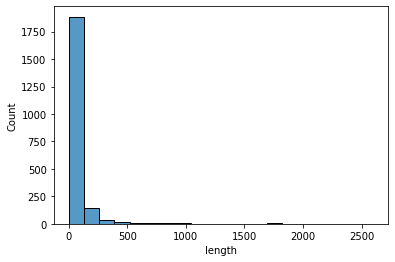

In [184]:
sd.histplot(df['length'],bins=20)

In [185]:
df.describe()

,length
count,2107.000000
mean,73.883246
std,166.858384
min,0.000000
25%,16.000000
50%,40.000000
75%,76.000000
max,2599.000000


In [186]:
def most_freq_words(reviews):

    # text = reviews['review_text'].apply(lambda x : text_preprocess(x))
    most_freq_words = pd.DataFrame(reviews['review_text'].str.split(expand=True).stack().value_counts(),columns=['Count'])
    pypl.figure(figsize=(16,8))
    sd.barplot(x=most_freq_words.index[:10],y=most_freq_words['Count'][:10])
    pypl.show()

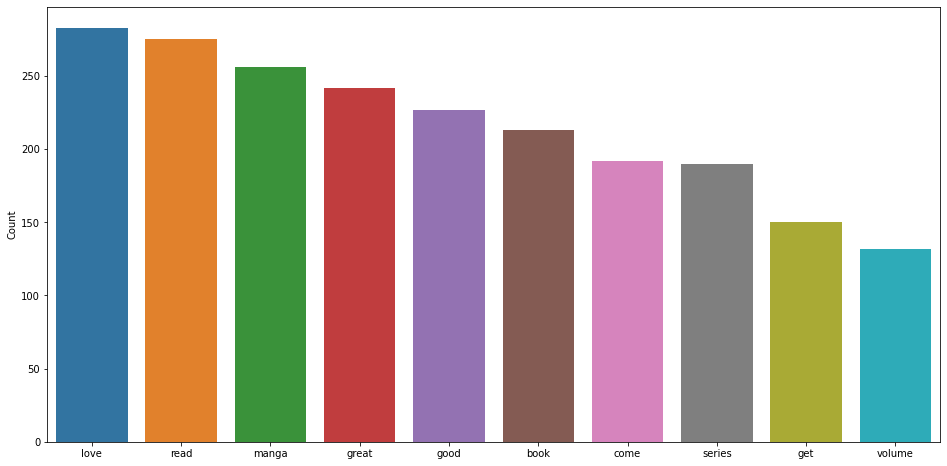

In [187]:
most_freq_words(df.loc[df['rating'] == '5'])

In [188]:
def most_freq_words_review(reviews):

    text = reviews['title'].apply(lambda x : text_preprocess(x))
    most_freq_words = pd.DataFrame(text.str.split(expand=True).stack().value_counts(),columns=['Count'])
    pypl.figure(figsize=(16,8))
    sd.barplot(x=most_freq_words.index[:10],y=most_freq_words['Count'][:10])
    pypl.show()

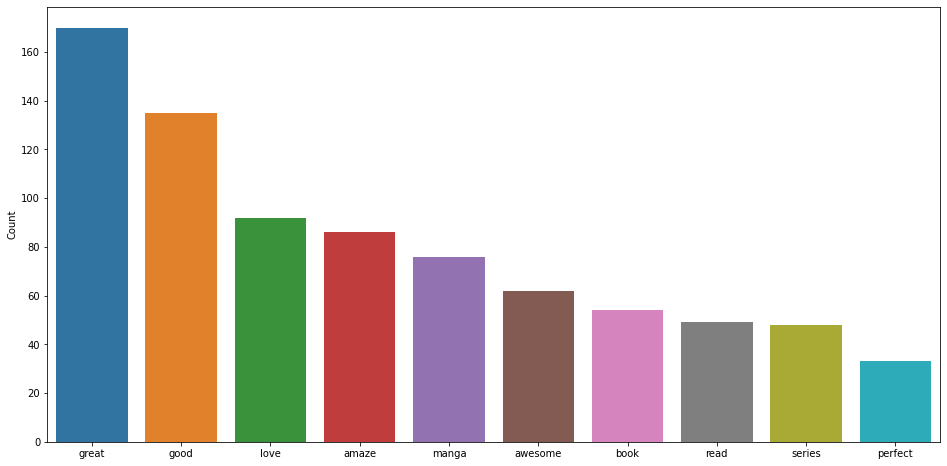

In [189]:
most_freq_words_review(df.loc[df['rating'] == '5'])

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [216]:
arces = []

def print_topics(model, vectorizer, top_n=10):
     topi = []
     
     for idx, topic in enumerate(model.components_):
         print("\nTopic : " ,str(idx),"\n")
         for i in topic.argsort()[:-top_n-1:-1]:
                topi.append((vectorizer.get_feature_names()[i]))
         print(topi)
         arces.append(topi[:])
         topi.clear()
     print(arces)

def get_topics(n_gram_range,no_of_topics,df,text_type):

    vec = CountVectorizer(ngram_range=n_gram_range)
    df[text_type] = df[text_type].apply(lambda x : text_preprocess(x))

    x = vec.fit_transform(df[text_type].values)
    
    lda10 = LatentDirichletAllocation(n_components=no_of_topics, random_state=42)
    
    lda10.fit_transform(x)
    
    print_topics(lda10,vec)


In [217]:
get_topics((2,2),3,df.loc[df['rating'] == '2'],'review_text')
# print(arces)


Topic :  0 

['show nesuko', 'repeat chapters', 'vital scene', 'probably come', 'chapters repeat', 'nesuko part', 'scene cover', 'cover show', 'chapters vital', 'miss chapters']

Topic :  1 

['xtra get', 'pay xtra', 'take months', 'condition im', 'bad condition', 'glad come', 'personally dont', 'manga bad', 'like manga', 'like come']

Topic :  2 

['favorite anime', 'really fast', 'really upset', 'daughter want', 'long time', 'lower quality', 'manga long', 'minutes ago', 'page really', 'give two']
[['show nesuko', 'repeat chapters', 'vital scene', 'probably come', 'chapters repeat', 'nesuko part', 'scene cover', 'cover show', 'chapters vital', 'miss chapters'], ['xtra get', 'pay xtra', 'take months', 'condition im', 'bad condition', 'glad come', 'personally dont', 'manga bad', 'like manga', 'like come'], ['favorite anime', 'really fast', 'really upset', 'daughter want', 'long time', 'lower quality', 'manga long', 'minutes ago', 'page really', 'give two']]


<ipython-input-216-ab6f6c59e468>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_type] = df[text_type].apply(lambda x : text_preprocess(x))


In [193]:
get_topics((1,2),10,df.loc[df['rating'] == '5'],'title')

<ipython-input-191-7dd40b602216>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_type] = df[text_type].apply(lambda x : text_preprocess(x))



Topic :  0 

['perfect', 'buy', 'great', 'perfect condition', 'condition', 'read', 'great read', 'expect', 'muy', 'en muy']

Topic :  1 

['perfect', 'buy', 'great', 'perfect condition', 'condition', 'read', 'great read', 'expect', 'muy', 'en muy', 'good', 'quality', 'good quality', 'must', 'libro', 'read', 'star', 'end', 'anime', 'fantastic']

Topic :  2 

['perfect', 'buy', 'great', 'perfect condition', 'condition', 'read', 'great read', 'expect', 'muy', 'en muy', 'good', 'quality', 'good quality', 'must', 'libro', 'read', 'star', 'end', 'anime', 'fantastic', 'get', 'like', 'anime', 'go', 'things', 'come', 'volume', 'see', 'exactly', 'things go']

Topic :  3 

['perfect', 'buy', 'great', 'perfect condition', 'condition', 'read', 'great read', 'expect', 'muy', 'en muy', 'good', 'quality', 'good quality', 'must', 'libro', 'read', 'star', 'end', 'anime', 'fantastic', 'get', 'like', 'anime', 'go', 'things', 'come', 'volume', 'see', 'exactly', 'things go', 'book', 'great', 'great book', 